# Investigating BootStrap Intervals for LASSO

Created in iPython Notebook 09/16/2015 by
  **Guduguntla Vamshi <gudugu@ncsu.edu>**

** Description **
- Simulating m(=1000) data-sets with p(=10) covariates 
- Data set generated with p(=10) randomly generated parameter estimates.


In [121]:
import numpy as np
from scipy import stats
import scikits.bootstrap as boot
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib as plt
%matplotlib inline 
table = pd.DataFrame(columns=['beta1','beta2','beta3','beta4','beta5'])

In [126]:
def bootstrap_lasso(m):
    np.random.seed(m*212222)
    n_samples, n_features = 1000, 5
    X = np.random.randn(n_samples, n_features)   
    coef = 3 * np.random.randn(n_features)
    inds = np.arange(n_features)
    np.random.shuffle(inds)
    coef[inds[10:]] = 0  # sparsify coef
    y = np.dot(X, coef)    
    lasso = Lasso(alpha=0.1)
    y_pred_lasso = lasso.fit(X, y)   
    global r1
    r1 = lasso.coef_
    def my_function2(i):
        lasso = Lasso(alpha=0.1)
        lasso.fit(X[i],y[i])
        return lasso.coef_
# 95% Confidence Interval 
    global ci
    ci = boot.ci(np.arange(len(X)), statfunction=my_function2, alpha=0.01, n_samples=1000, method='pi')    
    table.loc[m,'beta1'] = int(r1[0] > ci[0][0] and r1[0] < ci[1][0])
    table.loc[m,'beta2'] = int(r1[1] > ci[0][1] and r1[1] < ci[1][1])
    table.loc[m,'beta3'] = int(r1[2] > ci[0][2] and r1[2] < ci[1][2])
    table.loc[m,'beta4'] = int(r1[3] > ci[0][3] and r1[3] < ci[1][3])
    table.loc[m,'beta5'] = int(r1[4] > ci[0][4] and r1[4] < ci[1][4])


**Simuate m=1000 datasets**

In [127]:
for m in range(0,100):
    bootstrap_lasso(m)


/Library/Python/2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samples; results may be unstable.", InstabilityWarning)
/Library/Python/2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samples; results may be unstable.", InstabilityWarning)
/Library/Python/2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samples; results may be unstable.", InstabilityWarning)
/Library/Python/2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samp

** Let us estimate the empirical coverage probability **

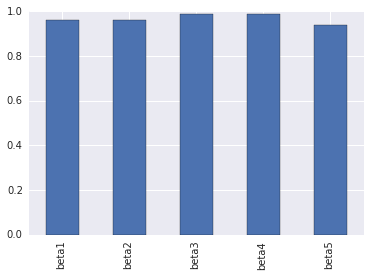

In [124]:
mean1 = table.mean()
std1 = table.std()
mean1.plot(kind='bar')

In [125]:
mean1

beta1    0.96
beta2    0.96
beta3    0.99
beta4    0.99
beta5    0.94
dtype: float64

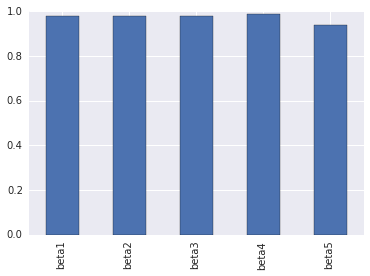

In [128]:
table.mean().plot(kind='bar')

In [129]:
table.mean()

beta1    0.98
beta2    0.98
beta3    0.98
beta4    0.99
beta5    0.94
dtype: float64